In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# Data loading and processing

In [7]:
print("Reading data...")
data = pd.read_csv(r'ENB2012_data.csv')
print("Data read!")

Reading data...
Data read!


In [8]:
data.columns = ['Relative_Compactness', 'Surface_Area','Wall_Area', 
                'Roof_Area','Overall_Height', 'Orientation','Glazing_Area', 'Glazing_Area_Distribution'
                ,'HL', 'CL']

In [9]:
#Check that everything is in order in the csv, ie non nulls etc
print("Printing basic info...")
print(data.shape)
print()
print(data.info())

Printing basic info...
(768, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative_Compactness         768 non-null float64
Surface_Area                 768 non-null float64
Wall_Area                    768 non-null float64
Roof_Area                    768 non-null float64
Overall_Height               768 non-null float64
Orientation                  768 non-null int64
Glazing_Area                 768 non-null float64
Glazing_Area_Distribution    768 non-null int64
HL                           768 non-null float64
CL                           768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


In [10]:
print("")

# Preprocessing Orientation

In [11]:
#I first created a dictionary which mapped the integers to strings and applied the mapping to the data set
print("Preprocessing data - applying one hot vectors..")
orient_dict = {2:'2_orient',3:'3_orient',4:'4_orient',5:'5_orient'}
data_new = data.replace({"Orientation": orient_dict})

#I then encoded the existing dataframe by dropping the original column and replacing it with the one-hot columns
data_new =data_new.drop('Orientation', 1).join(data_new.Orientation.str.get_dummies())

Preprocessing data - applying one hot vectors..


# Preprocessing Glazing Area Distribution

In [12]:
gaz_dict = {0:'0_gaz',1:'1_gaz',2:'2_gaz',3:'3_gaz',4:'4_gaz',5:'5_gaz'}
data_new = data_new.replace({"Glazing_Area_Distribution": gaz_dict})
data_new =data_new.drop('Glazing_Area_Distribution', 1).join(data_new.Glazing_Area_Distribution.str.get_dummies())
print(data_new.head())
print("Pre-processing done!")
print("")

   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Glazing_Area     HL     CL  2_orient  3_orient  4_orient  5_orient  0_gaz  \
0           0.0  15.55  21.33         1         0         0         0      1   
1           0.0  15.55  21.33         0         1         0         0      1   
2           0.0  15.55  21.33         0         0         1         0      1   
3           0.0  15.55  21.33         0         0         0         1      1   
4           0.0  20.84  28.28         1         0         0         0      1   

   1_gaz  2_gaz  3_gaz  4_gaz  5_gaz  
0    

# Splitting into training and testing

In [13]:
print("Splitting data into training and testing...")
data_training,data_test = train_test_split(data_new,test_size = 0.2,random_state = 42)

Splitting data into training and testing...


In [14]:
print("Training data has length: " +str(len(data_training)))
print("Testing data has length: " +str(len(data_test)))
print("")

Training data has length: 614
Testing data has length: 154



# Describing data

In [15]:
#Look at data and some descriptive statistics
print("Describing data...")
print(data_training.describe())
print("")

Describing data...
       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            614.000000    614.000000  614.000000  614.000000   
mean               0.761678    673.829805  318.819218  177.505293   
std                0.105424     88.161209   43.335953   44.960238   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.660000    612.500000  294.000000  147.000000   
50%                0.740000    686.000000  318.500000  220.500000   
75%                0.820000    759.500000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Glazing_Area          HL          CL    2_orient  \
count      614.000000    614.000000  614.000000  614.000000  614.000000   
mean         5.221498      0.235423   22.155033   24.410765    0.239414   
std          1.751195      0.134152   10.054280    9.476566    0.427074   
min          3.500000      0.000000    6.010000   10.900000

In [16]:
print("Checking number of distincct values in each column....")
for column in data_training.columns:
    distinct = len(data_training[column].unique())
    print('%s %d' % (column, distinct))
print("")

Checking number of distincct values in each column....
Relative_Compactness 12
Surface_Area 12
Wall_Area 7
Roof_Area 4
Overall_Height 2
Glazing_Area 4
HL 490
CL 526
2_orient 2
3_orient 2
4_orient 2
5_orient 2
0_gaz 2
1_gaz 2
2_gaz 2
3_gaz 2
4_gaz 2
5_gaz 2



In [17]:
print(data_training.groupby('Relative_Compactness').size())
print("")

Relative_Compactness
0.62    55
0.64    51
0.66    52
0.69    55
0.71    50
0.74    49
0.76    50
0.79    50
0.82    53
0.86    52
0.90    48
0.98    49
dtype: int64



# Plotting histograms

Plotting histograms



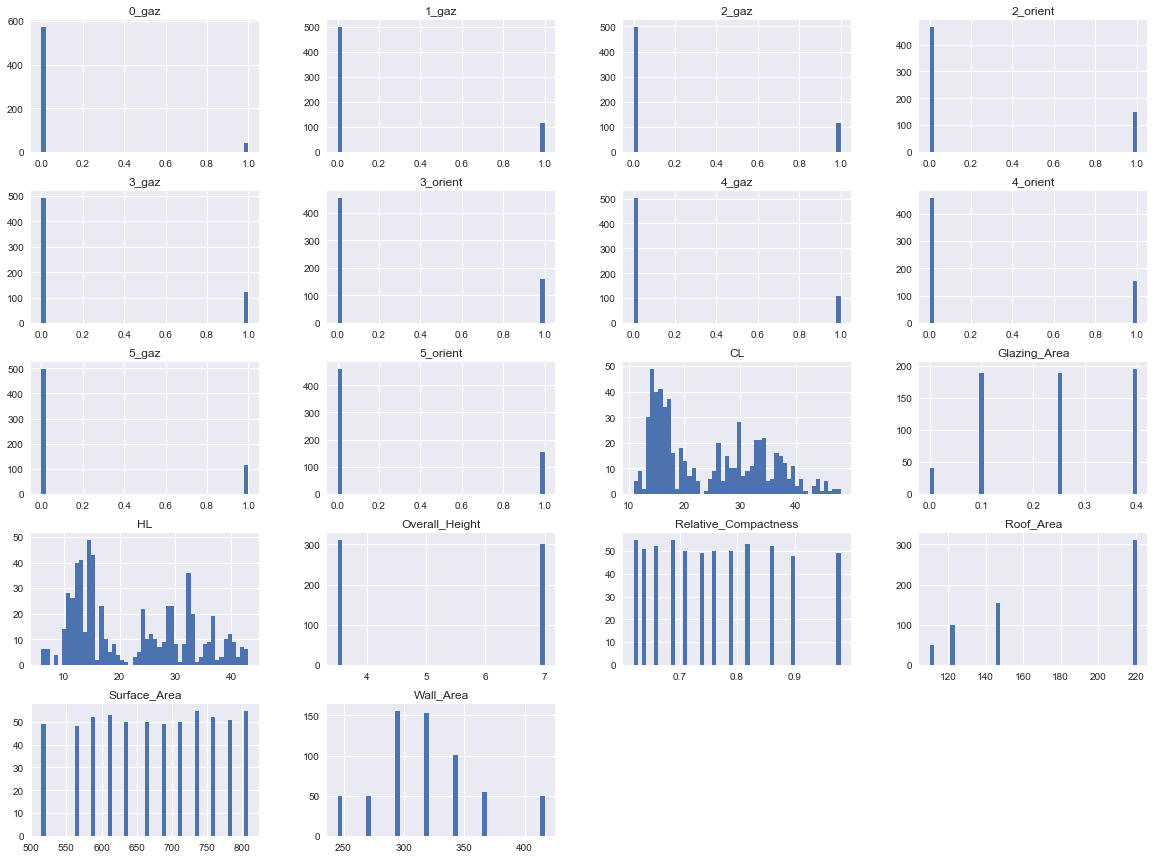

In [18]:
print("Plotting histograms")
data_training.hist(bins = 50, figsize = (20,15))
print("")

# Plotting scatter

Plotting scatter plots
Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Glazing_Area', 'HL', 'CL', '2_orient', '3_orient',
       '4_orient', '5_orient', '0_gaz', '1_gaz', '2_gaz', '3_gaz', '4_gaz',
       '5_gaz'],
      dtype='object')
Relative_Compactness
Surface_Area
Wall_Area
Roof_Area
Overall_Height
Glazing_Area


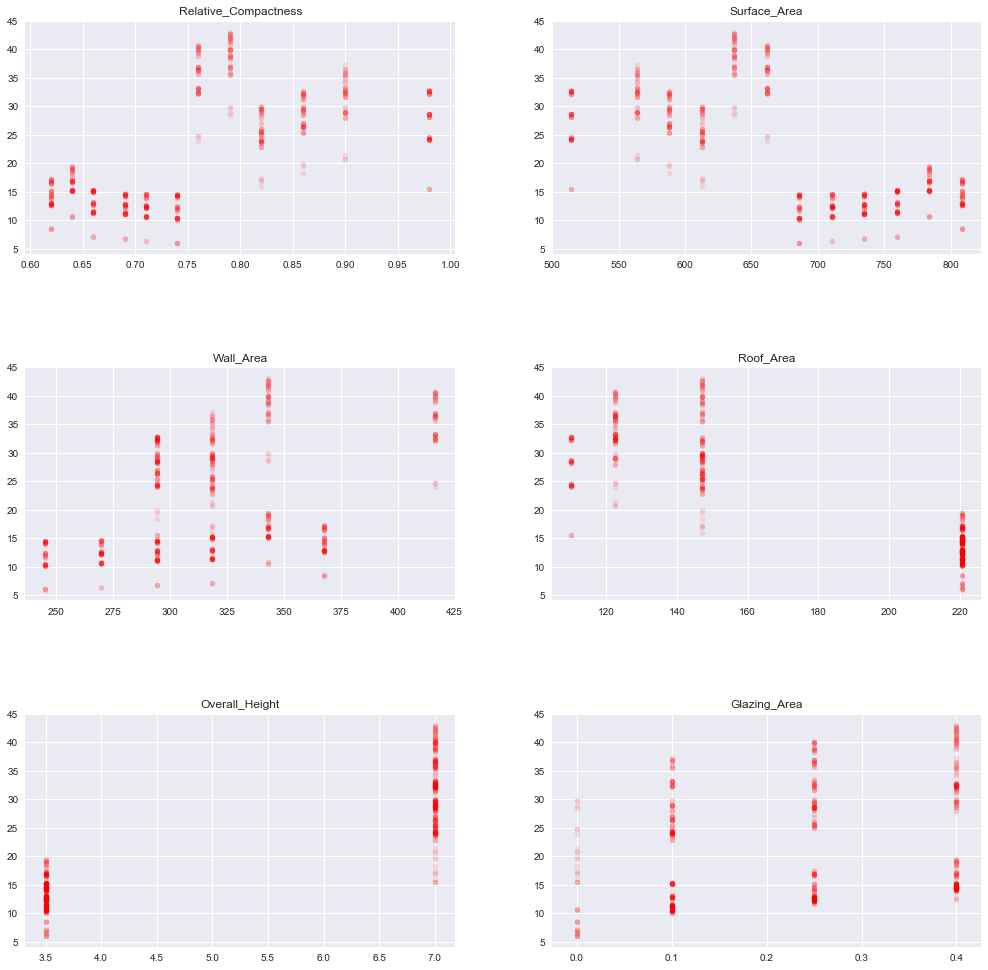

In [19]:
print("Plotting scatter plots")
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False,sharey=False)
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)

titles = data_training.columns
print(titles)
# axes.flat returns the set of axes as a flat (1D) array instead
# of the two-dimensional version we used earlier
for ax, title in zip(axes.flat, titles):
    print(title)
    ax.scatter(data_training[title], data_training['HL'],s= 25, alpha = 0.1, c = 'R')
    ax.set_title(title)
    ax.grid(True)

plt.show()
print("")

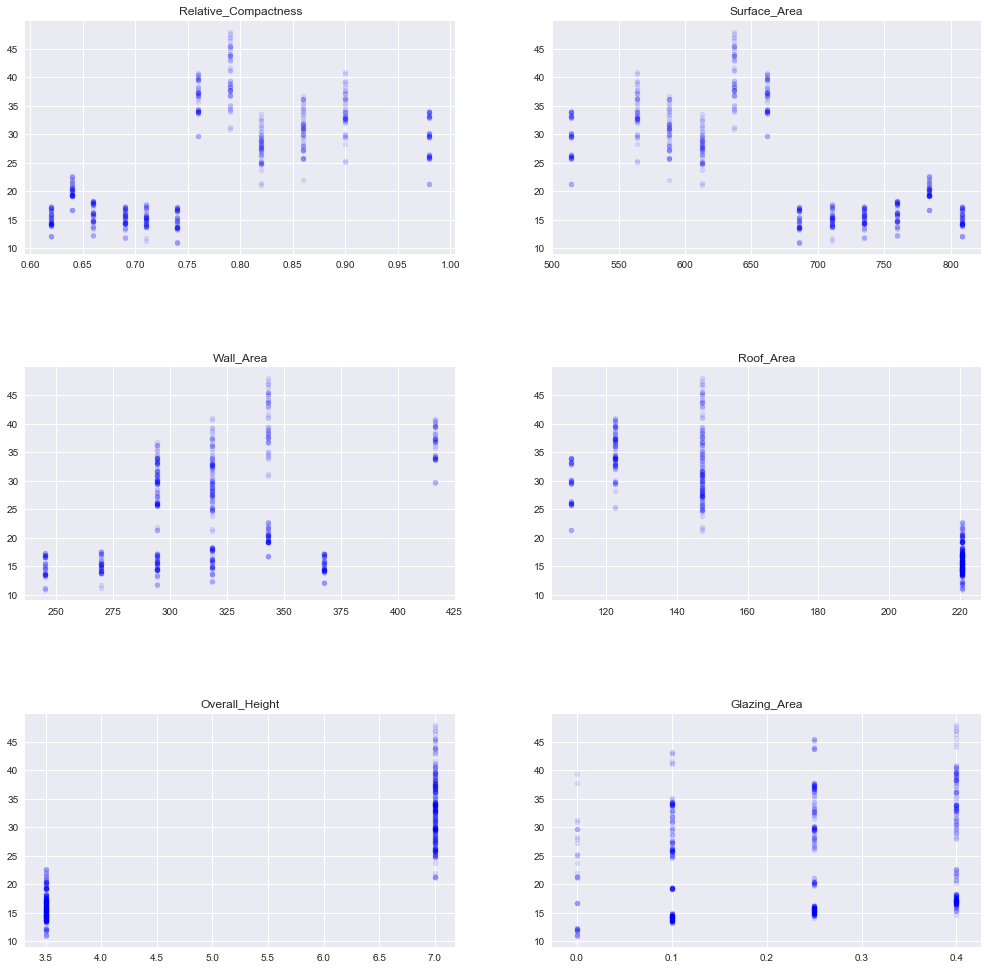

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False,sharey=False)
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)

titles = data_training.columns

# axes.flat returns the set of axes as a flat (1D) array instead
# of the two-dimensional version we used earlier
for ax, title in zip(axes.flat, titles):
    ax.scatter(data_training[title], data_training['CL'],s= 25, alpha = 0.1, c = 'B')
    ax.set_title(title)
    ax.grid(True)

plt.show()

# Plotting correlation matrix

Plotting correlation matrix


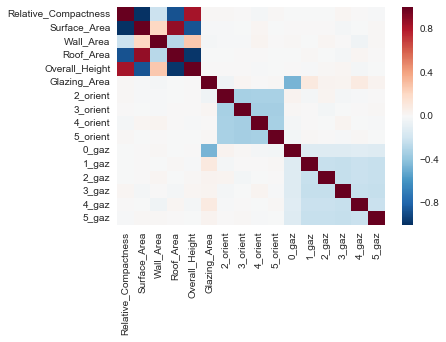

In [21]:
print("Plotting correlation matrix")
#This plot seems consistent with the papers
corr = data_training.drop(['HL', 'CL'], axis = 1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [22]:
#These results seem consistent with the paper where X8 and X6 fail to have significant correlations
print("Plotting correlations")
corr_matrix = data_training.corr(method='pearson')
print(corr_matrix['HL'].sort_values(ascending = False))
print("")

Plotting correlations
HL                      1.000000
CL                      0.976316
Overall_Height          0.889154
Relative_Compactness    0.629314
Wall_Area               0.439092
Glazing_Area            0.276184
2_gaz                   0.045239
3_gaz                   0.036867
1_gaz                   0.028050
5_gaz                   0.022630
3_orient                0.004852
4_orient                0.003139
5_orient               -0.002226
2_orient               -0.005919
4_gaz                  -0.006415
0_gaz                  -0.200764
Surface_Area           -0.664684
Roof_Area              -0.863294
Name: HL, dtype: float64



In [23]:
#These results seem consistent with the paper where X8 and X6 fail to have significant correlations
corr_matrix = data_training.corr(method='spearman')
print(corr_matrix['HL'].sort_values(ascending = False))
print("")

HL                      1.000000
CL                      0.972061
Overall_Height          0.861190
Relative_Compactness    0.627326
Wall_Area               0.448936
Glazing_Area            0.329600
2_gaz                   0.045537
1_gaz                   0.045195
3_gaz                   0.024493
3_orient                0.009838
5_gaz                   0.009067
5_orient                0.001179
4_gaz                   0.000923
2_orient               -0.005276
4_orient               -0.005912
0_gaz                  -0.198326
Surface_Area           -0.627326
Roof_Area              -0.809685
Name: HL, dtype: float64



In [24]:
corr_matrix = data_training.corr(method='pearson')
corr_matrix['CL'].sort_values(ascending = False)

CL                      1.000000
HL                      0.976316
Overall_Height          0.894927
Relative_Compactness    0.642148
Wall_Area               0.410905
Glazing_Area            0.212642
2_gaz                   0.038343
3_gaz                   0.025994
1_gaz                   0.018505
5_orient                0.018194
2_orient                0.006364
5_gaz                   0.002545
4_gaz                  -0.005833
4_orient               -0.007609
3_orient               -0.016617
0_gaz                  -0.126501
Surface_Area           -0.679988
Roof_Area              -0.864714
Name: CL, dtype: float64

In [25]:
corr_matrix = data_training.corr(method='spearman')
corr_matrix['CL'].sort_values(ascending = False)

CL                      1.000000
HL                      0.972061
Overall_Height          0.864884
Relative_Compactness    0.658746
Wall_Area               0.391533
Glazing_Area            0.293281
2_gaz                   0.039579
1_gaz                   0.037810
5_orient                0.019204
3_gaz                   0.017182
4_gaz                   0.004912
2_orient               -0.001809
4_orient               -0.003659
5_gaz                  -0.008196
3_orient               -0.013571
0_gaz                  -0.144430
Surface_Area           -0.658746
Roof_Area              -0.810676
Name: CL, dtype: float64

In [26]:
data_training.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,HL,CL,2_orient,3_orient,4_orient,5_orient,0_gaz,1_gaz,2_gaz,3_gaz,4_gaz,5_gaz
60,0.82,612.5,318.5,147.0,7.0,0.10,23.53,27.31,1,0,0,0,0,1,0,0,0,0
618,0.64,784.0,343.0,220.5,3.5,0.40,18.90,22.09,0,0,1,0,0,0,1,0,0,0
346,0.86,588.0,294.0,147.0,7.0,0.25,29.27,29.90,0,0,1,0,0,0,1,0,0,0
294,0.90,563.5,318.5,122.5,7.0,0.25,32.84,32.71,0,0,1,0,0,1,0,0,0,0
231,0.66,759.5,318.5,220.5,3.5,0.10,11.43,14.83,0,0,0,1,0,0,0,0,1,0


In [27]:
#normalized_df=(data_training['5_gaz']-data_training['5_gaz'].mean())/data_training['5_gaz'].std()

# Linear Regression

# All features

In [28]:
print("Linear regression with all features....")
X = data_training.drop(['HL', 'CL'], axis = 1)
X_columns = X[:0].columns
X = X.values

y = data_training['HL']


Linear regression with all features....


In [29]:
scalar = StandardScaler()
clf = LinearRegression()

pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

scores = cross_val_score(pipeline, X, y,scoring="neg_mean_squared_error", cv = 10)
scores =np.absolute(-scores)

In [30]:
print(scores.mean())
print(scores.std())
print("")

8.010020962484646
2.129426503221402



# Slight feature selection

In [31]:
print("Linear regression with some features....")
X = data_training[['Relative_Compactness', 'Surface_Area','Wall_Area','Roof_Area','Overall_Height','Glazing_Area','0_gaz']]
#X_columns = X[:0].columns
X = X.values
y = data_training['HL']

Linear regression with some features....


In [32]:
scalar = StandardScaler()
clf = LinearRegression()

pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

scores = cross_val_score(pipeline, X, y,scoring="neg_mean_squared_error", cv = 10)
scores =np.absolute(-scores)

In [33]:
print(scores.mean())
print(scores.std())
print("")

7.850439390906419
2.103379922625123



# Three features

In [34]:
print("Linear regression with three features....")
y = data_training['HL']
X = data_training[['Overall_Height','Wall_Area','Glazing_Area']]

Linear regression with three features....


In [35]:
scalar = StandardScaler()
clf = LinearRegression()

pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

scores = cross_val_score(pipeline, X, y,scoring="neg_mean_squared_error", cv = 10)
scores =np.absolute(-scores)

In [36]:
#print(list(zip(X_columns,model.coef_)))

In [37]:
print(scores.mean())
print(scores.std())
print("")

9.056254916479343
2.0659858873372032



# Training full model

In [38]:
print("Training full model...")
X_train = data_training[['Relative_Compactness', 'Surface_Area','Wall_Area','Roof_Area','Overall_Height','Glazing_Area','0_gaz']]
y_train = data_training['HL']
X_columns = X_train[:0].columns
#Standardize training set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


X_test = data_test[['Relative_Compactness', 'Surface_Area','Wall_Area','Roof_Area','Overall_Height','Glazing_Area','0_gaz']]
#Apply same transformation on testing set
X_test = sc.transform(X_test)

y_test = data_test['HL']

Training full model...


C:\Users\Eelis\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Eelis\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Eelis\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [39]:
#Getting the MSE
model = LinearRegression()
model.fit(X_train,y_train)
lin_predict = model.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_predict)

In [40]:
print(lin_mse.mean())

7.997766329656859


In [41]:
print("The coefficeints of the full linear model are:")
print(list(zip(X_columns,model.coef_)))
print("")

The coefficeints of the full linear model are:
[('Relative_Compactness', -6.607085185889754), ('Surface_Area', -3.647931645467614), ('Wall_Area', 0.7687172133268233), ('Roof_Area', -3.947033800254073), ('Overall_Height', 7.2344261214937315), ('Glazing_Area', 2.300952258469276), ('0_gaz', -1.0037514079569132)]



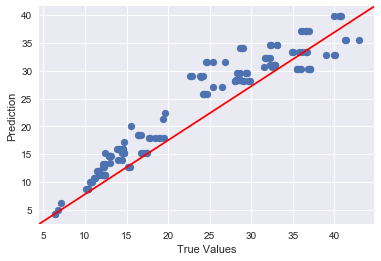

In [42]:
## The line / model
predictions = model.predict(X_test)
plt.figure()
plt.scatter(y_test, predictions)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.xlabel('True Values')
plt.ylabel('Prediction')
plt.show()
print("")

# Polynomial

In [43]:
print("Training polynomial")
degrees = [1,2,3,4]
for degree in degrees: 
   # X = data_training.drop(['HL', 'CL'], axis = 1)
    X = data_training[['Relative_Compactness', 'Surface_Area','Wall_Area','Roof_Area','Overall_Height','Glazing_Area','0_gaz']]
    y = data_training['HL']
    scalar = StandardScaler()
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),('transformer', scalar), ("linear_regression", linear_regression)])
    #model.fit(X, y)

    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    scores =np.absolute(-scores)
    print("Degree is " +str(degree))
    print("MSE is " +str(scores.mean()))
print("")

Training polynomial
Degree is 1
MSE is 7.850439390906419
Degree is 2
MSE is 0.24113663333560237
Degree is 3
MSE is 0.23542839431525828
Degree is 4
MSE is 0.23119232817712548



# Full model

In [44]:
print("Training full model...")
X_train = data_training[['Relative_Compactness', 'Surface_Area','Wall_Area','Roof_Area','Overall_Height','Glazing_Area','0_gaz']]

y_train = data_training['HL']

X_test = data_test[['Relative_Compactness', 'Surface_Area','Wall_Area','Roof_Area','Overall_Height','Glazing_Area','0_gaz']]
y_test = data_test['HL']

scalar = StandardScaler()

#Polynomial and linear.
poly_features = PolynomialFeatures(degree=2,include_bias=False)
#poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(X_train)

x_poly_train = scalar.fit_transform(x_poly_train)

model = LinearRegression()

#Fit model
model.fit(x_poly_train, y_train)

# Compare with test data
x_poly_test = poly_features.fit_transform(X_test)
x_poly_test = scalar.transform(x_poly_test)

#model.score(x_poly_test,y_test)
poly_predict = model.predict(x_poly_test)
poly_mse = mean_squared_error(y_test, poly_predict)
poly_mse = np.absolute(-poly_mse)

Training full model...


In [45]:
len(model.coef_)

35

In [46]:
print("MSE of 2nd order polynoymal is: " + str(poly_mse))
print("")

MSE of 2nd order polynoymal is: 0.2690083492762479



In [47]:
print("Model coefficeint are")
print(model.coef_)
print("")

Model coefficeint are
[ 8.22833122e+11 -6.26077427e+11  7.90947301e+11  1.55216297e+11
 -3.94004331e+12  2.95735001e+00  3.04928385e+11 -2.86476044e+04
 -5.78412686e+11  1.04403104e+13  9.99784628e+12 -1.02252667e+12
  2.68083036e+00  8.87509784e-01  4.49050376e+12 -2.20684260e+11
  1.28544634e+13  2.51694917e+12  2.26348113e+12  2.06831404e+12
 -9.53589141e+11 -6.78398209e+12 -2.55270288e+12 -1.07185121e+12
 -9.82149007e+11 -1.29928822e+13  4.65051548e+11 -1.29895476e+12
 -1.11241200e+12  8.84307509e+11 -1.97507360e+00  8.76268428e-02
  3.71691980e-01  0.00000000e+00 -3.04928385e+11]



Plotting prediction against model


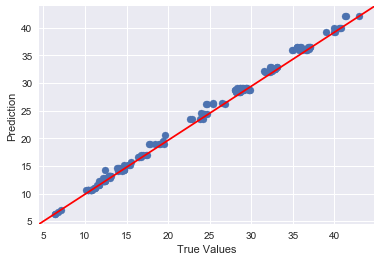

In [48]:
print("Plotting prediction against model")
## The line / model
predictions = model.predict(x_poly_test)
plt.figure()
plt.scatter(y_test, predictions)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.xlabel('True Values')
plt.ylabel('Prediction')
plt.show()
print("")

# Elastic net

It seems reasonable, based upon the coefficients, that we would want some regularization. One option could have been to go with Ridge regression. However, based upon the paper, some features were selected to be irrelivent. Hence, I think a Laso regression could have been quite reasonable since it would perform automatic feature selection. However, I decided to go with more a middle ground and implement the elastic net.


In [49]:
print("Elastic net....")
X = data_training.drop(['HL', 'CL'], axis = 1)
y = data_training['HL']

poly = PolynomialFeatures(degree=3,include_bias=False)
X_poly = poly.fit_transform(X)

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', ElasticNet(max_iter = 100000,tol=0.0001))])

param_grid = [
    {'clf__alpha' : [0.01,0.1,1,5,10],
     'clf__l1_ratio':[0.2,0.4,0.6,0.7,0.8,1]}]


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=1, verbose=1, scoring= "neg_mean_squared_error")
grid.fit(X_poly, y)
print("Best parameters are...")
print(grid.best_params_)
print("")

Elastic net....
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.7min finished
C:\Users\Eelis\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters are...
{'clf__alpha': 0.01, 'clf__l1_ratio': 1}



# Elastic Net : Full model

In [50]:
print("Training full elastic model...")

sc = StandardScaler()
poly = PolynomialFeatures(degree=3,include_bias=False)

X_train = data_training.drop(['HL', 'CL'], axis = 1)
X_poly_train = poly.fit_transform(X_train)
X_poly_train = sc.fit_transform(X_poly_train)
y_train = data_training['HL']

X_test = data_test.drop(['HL', 'CL'], axis = 1)
X_poly_test = poly.fit_transform(X_test)
X_poly_test = sc.transform(X_poly_test)
y_test = data_test['HL']

Training full elastic model...


In [51]:
elastic_net = ElasticNet(alpha = 0.01,l1_ratio = 1,max_iter = 100000)
elastic_net.fit(X_poly_train,y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
len(elastic_net.coef_)

968

In [53]:
print("Non zero values....")
print(np.count_nonzero(elastic_net.coef_))

Non zero values....
59


In [54]:
elastic_net.coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.81898406e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [55]:
poly_predict = elastic_net.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, poly_predict)
poly_mse = np.absolute(-poly_mse)
print("Elastic MSE is:")
print(poly_mse)

Elastic MSE is:
4.7603626399898875
